# 디지털신호처리 (DSP) HW03 
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과

In [59]:
import os
if not os.path.exists('thinkdsp.py'): # thinkdsp파일 가져오기
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1.2
Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

In [60]:
if not os.path.exists('HW03.wav'): # 오디오 가져오기
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/HW03.wav

### 오디오 파일 듣기

In [61]:
from thinkdsp import read_wave, decorate

wave = read_wave('HW03.wav') # wave에 노래파일 읽기
wave.normalize() # 음량 일정하게 만들기 (정규화)
wave.make_audio() # 오디오파일 만들기

### 오디오 파일의 전체적인 wave 그래프

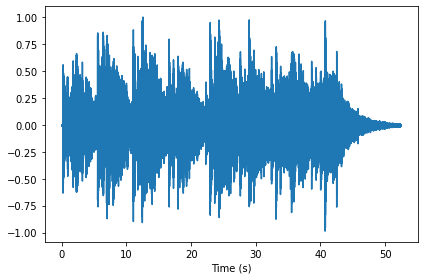

In [62]:
wave.plot()
decorate(xlabel='Time (s)') # 가로축 시간

### 오디오 파일을 0.4초 ~ 0.9초 까지 자르기
파동이 일정한 부분을 골라서 자름 (0.5초)

In [63]:
segment = wave.segment(start = 0.4, duration = 0.5) #wave자르기 (시작위치, 지속시간)
segment.make_audio()

### 위에서 자른 segment의 wave 그래프
(0.4초 ~ 0.9초)

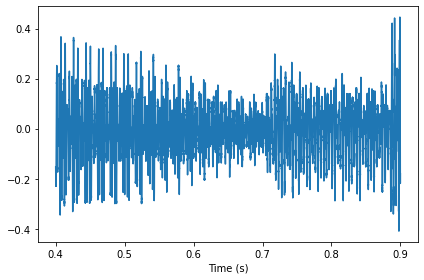

In [64]:
segment.plot()
decorate(xlabel='Time (s)') # 가로축 시간

### 더 짧게 자른 segment의 wave 그래프
(0.4초 ~ 0.41초)

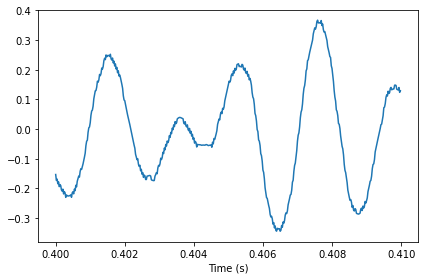

In [65]:
segment.segment(start = 0.4, duration = 0.01).plot()
decorate(xlabel='Time (s)') # 가로축 시간

### 스팩트럼 (Specturm)


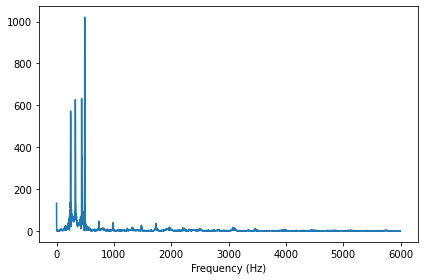

In [66]:
spectrum = segment.make_spectrum()
spectrum.plot(high = 6000) # 6000까지 보기
decorate(xlabel='Frequency (Hz)') # 가로축 freq(Hz)

### Fundamental Frequency(기본 주파수) & Dominant Frequency (주요 주파수) 성분이 모여있는 부분 확대

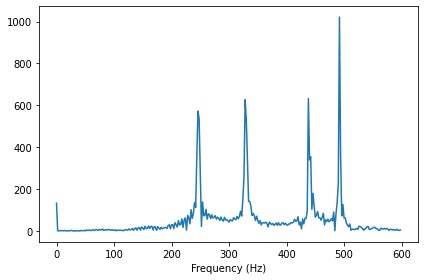

In [73]:
spectrum = segment.make_spectrum()
spectrum.plot(high = 600) # 600까지 보기
decorate(xlabel='Frequency (Hz)') # 가로축 freq(Hz)

### 스펙트럼의 가장 높은 점, 주파수을 내림차 순으로 20개 출력

In [72]:
spectrum.peaks()[:20] #(가장 높은 점, 주파수)

[(1021.3433278801705, 492.0),
 (632.3984594886965, 438.0),
 (627.1194333315291, 328.0),
 (573.204470258849, 246.0),
 (535.1044265404066, 248.0),
 (534.6892618240613, 330.0),
 (361.518693167041, 244.0),
 (360.83921538515216, 494.0),
 (355.2509569729849, 442.0),
 (339.84524291802865, 440.0),
 (335.211028429348, 332.0),
 (271.33351866404183, 250.0),
 (259.31471274922615, 326.0),
 (228.15883494966695, 490.0),
 (180.57409495812888, 446.0),
 (150.65712718613446, 324.0),
 (142.62545932564072, 334.0),
 (141.514659004776, 336.0),
 (139.1981776627148, 254.0),
 (136.1528181770861, 240.0)]

Domainant peak(주된 피크) : 492 Hz (가장 큰 strength를 가진 freq)

Foundamental : 246 Hz으로 예측 (freq중에 가장 성분이 낮은 freq)

Harmonics(고조파) : 246 Hz, 328 Hz, 438 Hz 등을 사용

waveform(spectrum모양)이 timbre(음색)을 결정한다. 단조롭지 않을수록 사람들은 음악이 풍부하고 따뜻하다고 느낀다.

### 고주파수 지우기

In [77]:
spectrum.low_pass(2000) # cutoff freq(2000) 위의 고음을 삭제하고 저음만 남는다

### 고주파수를 지운 오디오 파일 듣기
고주파수를 지우니 쨍한 소리가 지워지고 듣기가 편안해짐

In [70]:
spectrum.make_wave().make_audio()

## 시뮬레이션
#### 설정을 바꿔서 다른 샘플을 만들 수 있다.

In [75]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [76]:
from ipywidgets import interact, fixed

wave = read_wave('HW03.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…